# Visualizing the booking history of the UHCW dataset
## Definitions
The **booking history** refers to the status as "available" or "booked" of the appointments in the dataset at the various data collection times.

The **final status** refers to whether an appointment was eventually booked or went unused.
  


## Imports

In [1]:
import os
import pytz
import pandas as pd
import datetime
import UHCW
import matplotlib.pyplot as plt
%matplotlib inline

14h31m16s: Make copy of data...
14h31m16s: Type conversion: 
14h31m16s: Column appointment:
14h31m16s: Convert to datetime...
14h31m16s: Convert to London timezone...
14h31m16s: Column grab:
14h31m16s: Convert to datetime...
14h31m16s: Localize to UTC and convert to London timezone...
Cartesian product grabs by appointments...
2019-01-15 13:40:00+00:00
2019-01-17 15:30:00+00:00
Ignore grabs past appointments...
Restrict to past appointments...
2019-01-17 15:30:00+00:00
Sort by id, test type, appointment, grab...
Add status...
Add extra grab columns:
14:31:16: grab hour...
14:31:17: grab 3 hours...
14:31:17: grab day...


## Constants

In [15]:
IMG_DIR = os.path.join(os.path.expanduser("~"), "Projects/UHCW/IMAGE_FILES")

STATUS_TO_VALUE = {'available': 0, 'booked': 1}

## Helper functions

In [3]:
def write_line_to_desc(col, text, file):
    """Convenience function to add one line to a file in a particular format."""
    file.write(
        "{0}{1}{2}\n".format(
            col.ljust(COL_WIDTH),
            VERT_SEP,
            text
        )
    )
def timedelta_strftime(duration):
    """Convenience function to string format a timedelta."""
    string = "{0} days {1} hours {2} minutes".format(
        duration.days,
        duration.seconds//3600,
        duration.seconds//60
    )
    return string

## Data

In [4]:
%%time
print(datetime.datetime.now().strftime("Time: %H:%M:%S"))
foldername = 'Projects/UHCW'
# filename = 'appointments-tiny.csv'
# filename = 'appointments-less-tiny.csv'
# filename = 'appointments-24-hours.csv'
filename = 'appointments-three-weeks.csv'
filepath = os.path.join(os.path.expanduser("~"), foldername, filename)

filesize = os.path.getsize(filepath)
if filesize > 1e9:
    print("Size of data file: {}GB.".format(filesize//1e9))
elif filesize > 1e6:
    print("Size of data file: {}MB.".format(filesize//1e6))
elif filesize > 1e3:
    print("Size of data file: {}KB.".format(filesize//1e3))
else:
    print("Size of data file: {}B.".format(filesize))
print("Loading data...")
raw_data = pd.read_csv(filepath, sep=';')
raw_data.rename(
    index=str,
    columns={
        'center id': 'id',
        'appointment timestamp': 'appointment',
        'center age group': 'age group',
        'grab timestamp': 'grab'
    },
    inplace=True
)

Time: 14:31:18
Size of data file: 4.0GB.
Loading data...
CPU times: user 1min, sys: 14.2 s, total: 1min 14s
Wall time: 1min 17s


## Schedule (restricted to shorter grab period)
If the dataset is `appointments-three-weeks.csv`, which can be quite large for a regular laptop, restrict to a more manageable dataset.  This will be good enough to have very preliminary but yet useful insight on the data. 

**Note.**  The values are still of string type (object).  Thus, the comparisons are *alphanumerical*.

*(The next cell prints the current time to remember when the following cell was run.)*

In [5]:
print(datetime.datetime.now().strftime("Current time: %Hh %Mm %Ss"))

Current time: 14h 32m 35s


In [6]:
%%time
smaller_dataset = raw_data.copy()

# Restrict to a shorter data collection period:
smaller_dataset = smaller_dataset[
    smaller_dataset['grab'] < '2019-01-19'
]

# Restrict to a subset of test centers
# smaller_dataset = smaller_dataset[
#     (smaller_dataset['grab'] < '2019-01-19') & (
#         smaller_dataset['id'].apply(
#            lambda cid: cid in [10136, 10188, 10243]
#         ) 
#     )
# ]

# Perform type conversion
schedule = UHCW.prepare_UHCW_dataframe(smaller_dataset)

14h32m43s: Make copy of data...
14h32m43s: Type conversion: 
14h32m43s: Column appointment:
14h32m43s: Convert to datetime...
14h32m45s: Convert to London timezone...
14h38m42s: Column grab:
14h38m42s: Convert to datetime...
14h38m44s: Localize to UTC and convert to London timezone...
CPU times: user 8min 48s, sys: 10.1 s, total: 8min 58s
Wall time: 8min 57s


In [7]:
print(datetime.datetime.now().strftime("End of preprocessing:  %Hh %Mm %Ss"))

End of preprocessing:  14h 41m 33s


## The working schedule

Only consider past appointments (and ignore "age group" info which we won't use):

In [8]:
last_grab = schedule['grab'].max()
s = schedule.query('appointment <= @last_grab').copy()
s.drop('age group', axis=1, inplace=True)

## Center info

In [9]:
center_test_types = s.groupby('id')['test type'].unique().rename("test types").to_frame()#.reset_index()
center_test_types

,test types
id,
10136,"[Fasting Bloods, Non Fasting Bloods, INR Test]"
10137,[Blood Test]
10138,[Blood Test]
10188,"[Blood Test, INR Test]"
10207,[Blood Test]
10243,"[Blood Test, INR Test]"
10244,"[Blood Test, INR Test]"
10250,"[Blood Test, INR Test]"
10254,[Blood Test]


## Number of appointments

In [10]:
s.groupby(['id', 'test type'])['appointment'].nunique().to_frame()

appointment
id    test type                      
10136 Fasting Bloods               22
      INR Test                     41
      Non Fasting Bloods           70
10137 Blood Test                   27
10138 Blood Test                    4
10188 Blood Test                  249
      INR Test                     46
10207 Blood Test                  206
10243 Blood Test                  147
      INR Test                     54
10244 Blood Test                   27
      INR Test                      5
10250 Blood Test                   97
      INR Test                     57
10254 Blood Test                    2
10263 Blood Test                   15
      INR Test                      5
10266 Blood Test                   49
      INR Test                     38
10294 Blood Test                    7
10301 Blood Test                    6
10336 Blood Test                    9
10341 Blood Test                    7
10352 Blood Test                   57
      INR Test                     19
10449 Blood Test                    2

## Selected center and test type
For visualization and testing purposes it may be useful to focus on a particular center and test type:

In [11]:
cid = 10207. # 10136  # 10188 # 10250  # 10254  # 10263
test_type = "Blood Test"  # "Fasting Bloods" # "Non Fasting Bloods" # "INR Test"  # 

s0 = s.loc[(s['id'] == cid) & (s['test type'] == test_type), s.columns]

## The timegrid
The `schedule` contains a row for each appointment available at the times of data collection.
The timegrid gives the status of the appointment as "available" or "booked" at all data collection times.
This is the **booking history** associated with the schedule.
We can also determine whether an appointment was eventually booked or went unused.

In [12]:
t = UHCW.get_timegrid(s)

Cartesian product grabs by appointments...
2019-01-15 13:40:00+00:00
2019-01-18 15:00:00+00:00
Ignore grabs past appointments...
Restrict to past appointments...
2019-01-18 15:00:00+00:00
Sort by id, test type, appointment, grab...
Add status...
Add extra grab columns:
14:41:37: grab hour...
14:41:43: grab 3 hours...
14:41:48: grab day...


## Visualizing the booking history
The following cell plots the booking history for all centers and test types.  

Set `save_figure` to **True** to save plots as image files.
In this case, a brief description of the type of figure is appended to `DESCRIPTION-OF-RUNS.txt`.

10136
Fasting Bloods
Non Fasting Bloods
INR Test
10137
Blood Test
10138
Blood Test
10188
Blood Test
INR Test
10207
Blood Test
10243
Blood Test
INR Test
10244
Blood Test
INR Test
10250
Blood Test
INR Test
10254
Blood Test
10263
Blood Test
INR Test
10266
Blood Test
INR Test
10294
Blood Test
10301
Blood Test
10336
Blood Test


/Users/antoine/.pyenv/versions/3.7.1/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


10341
Blood Test
10352
Blood Test
INR Test
10449
Blood Test


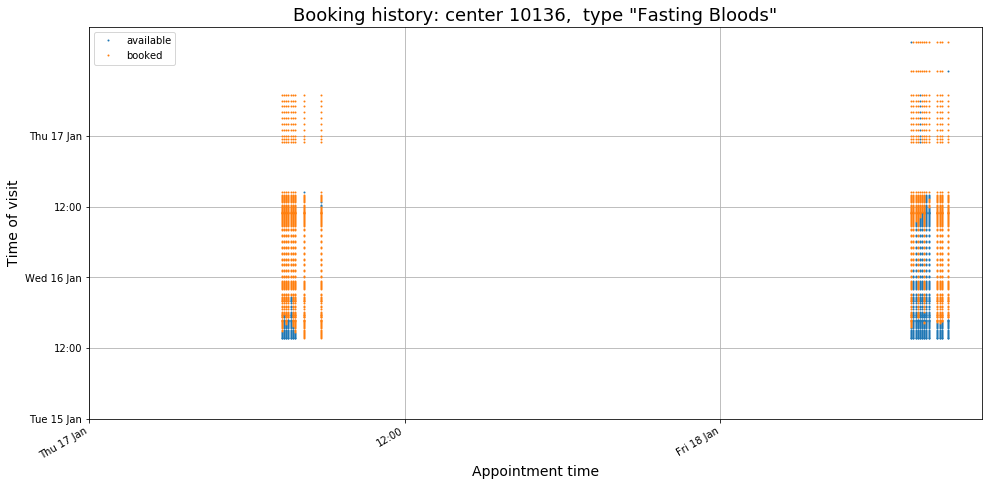

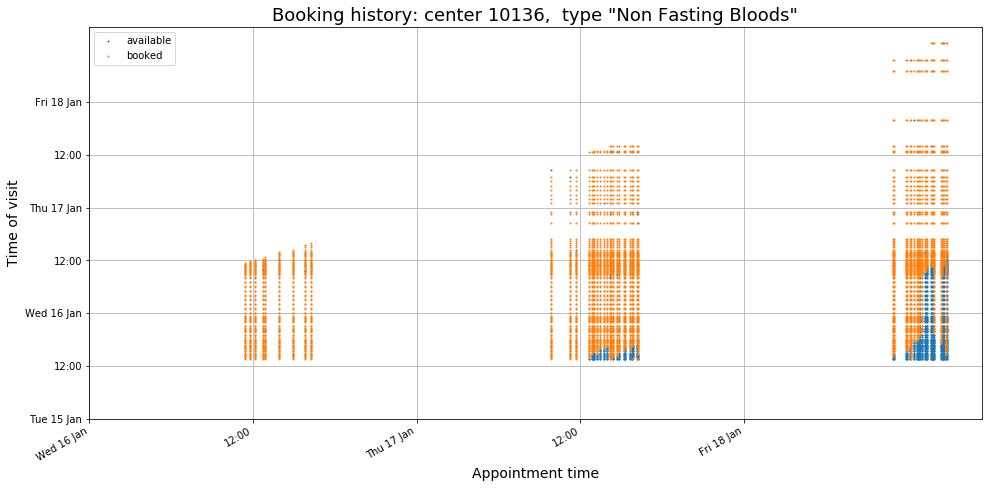

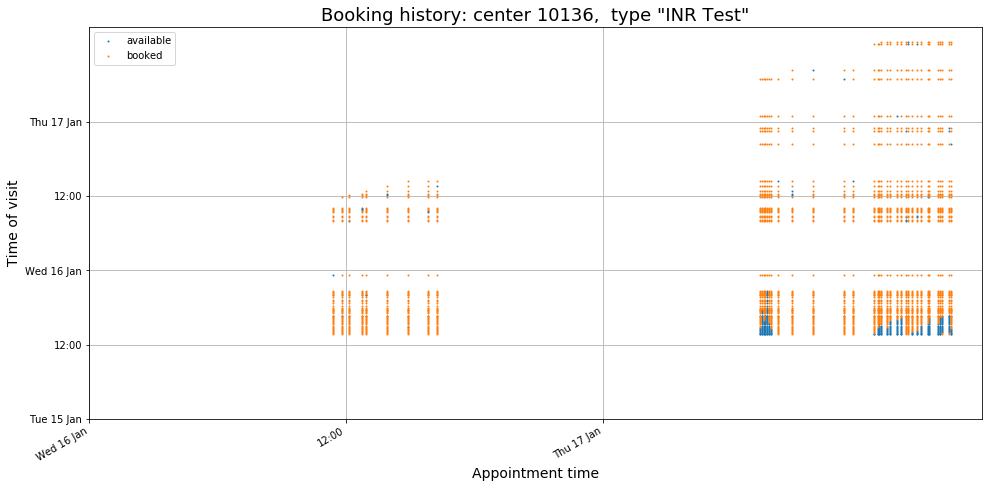

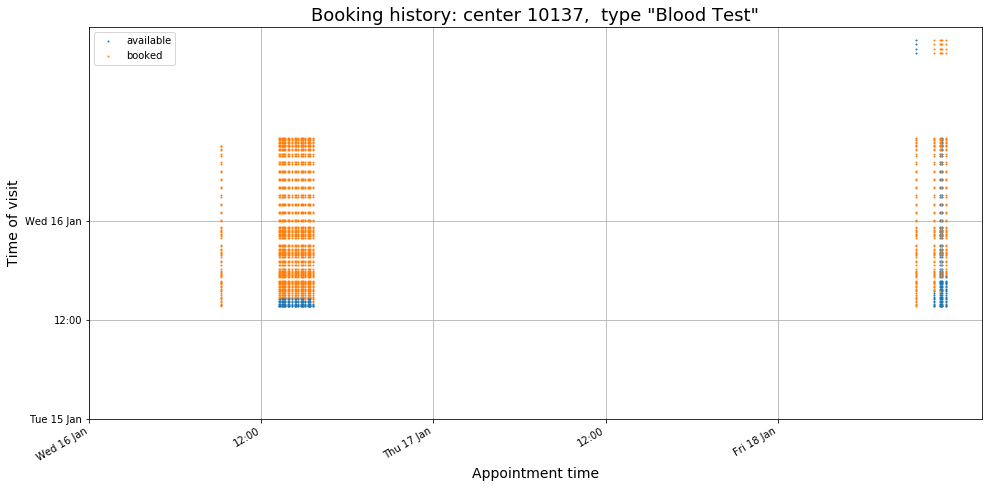

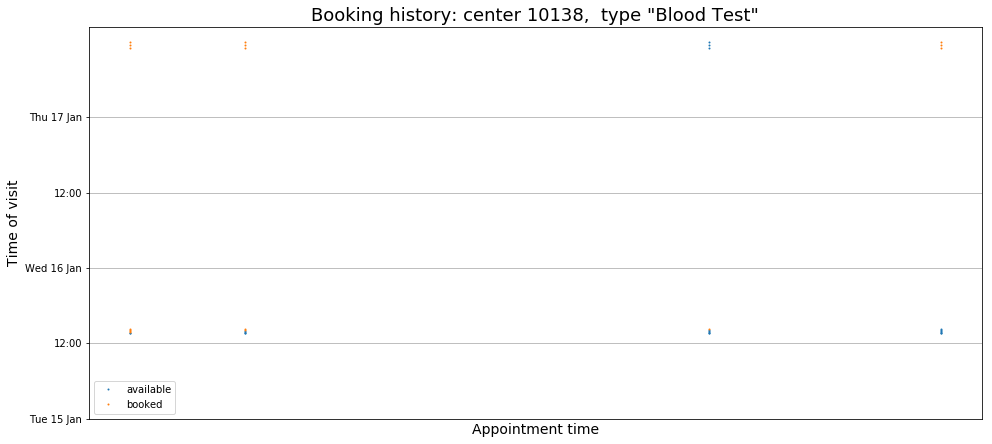

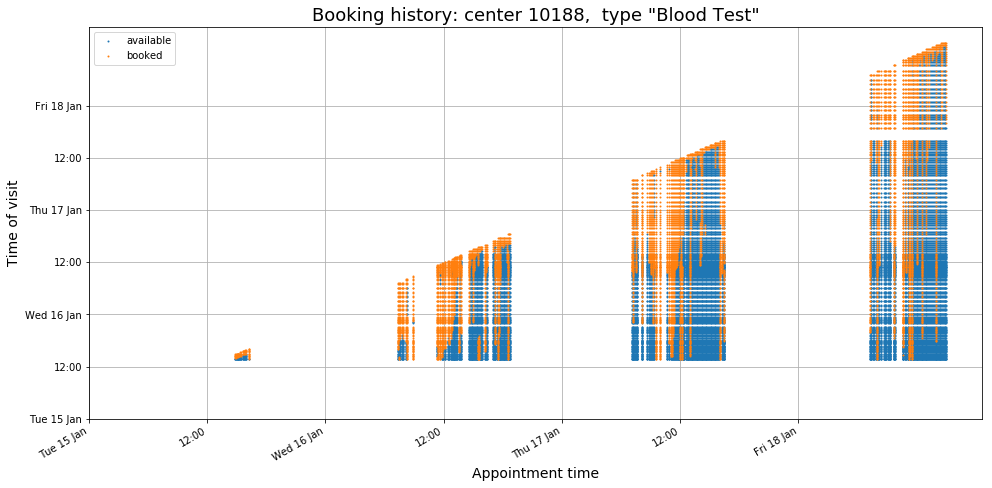

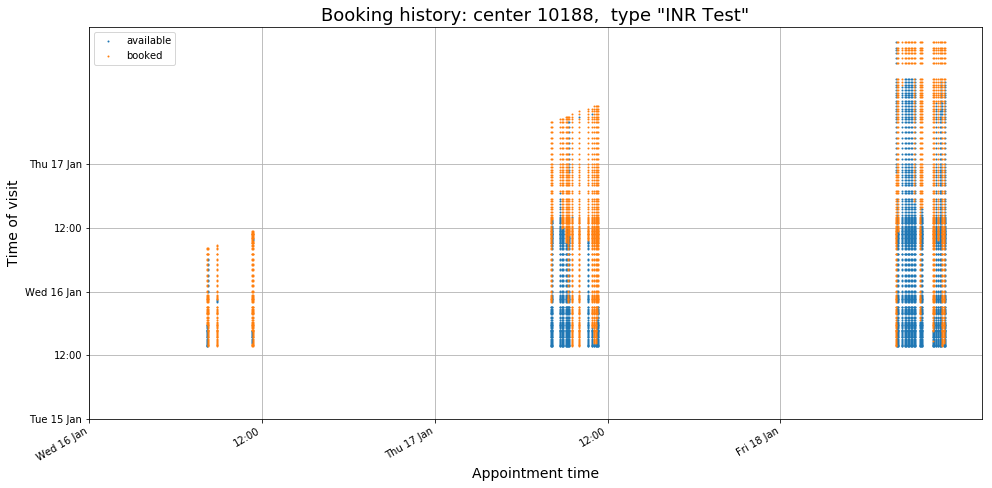

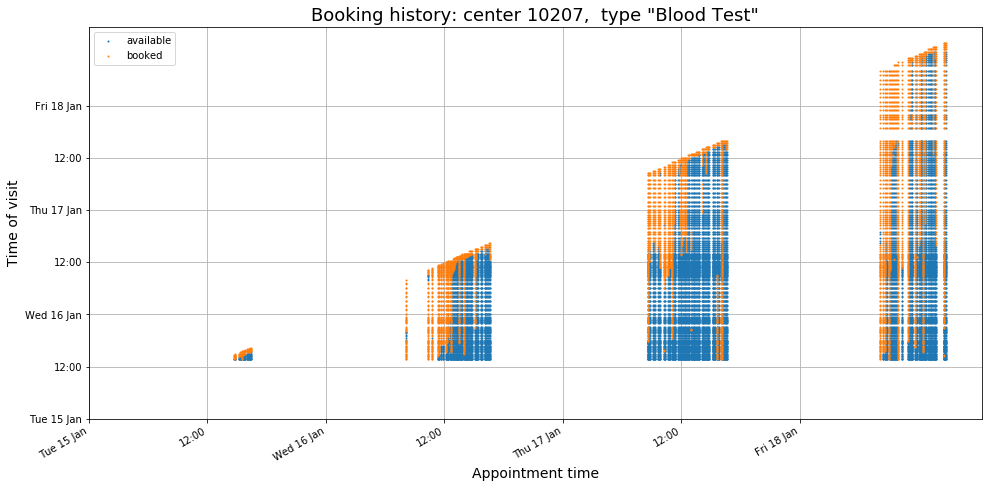

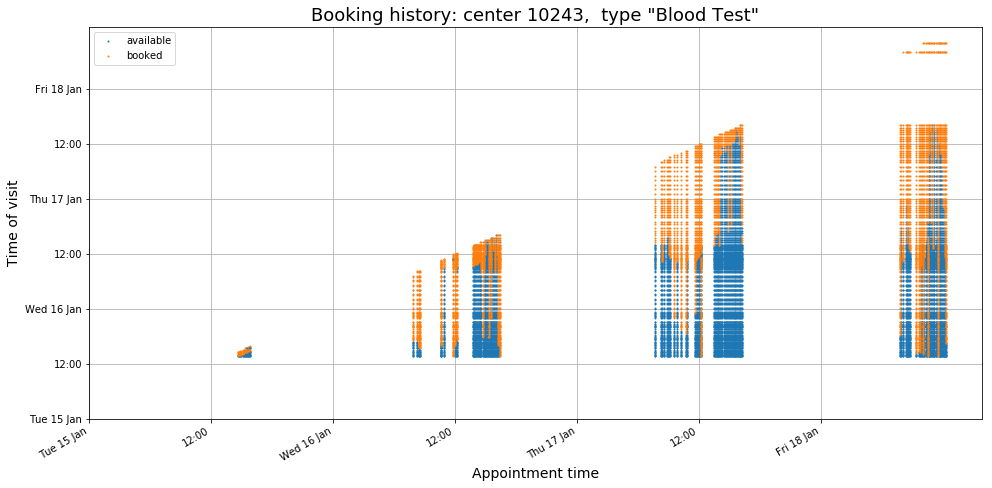

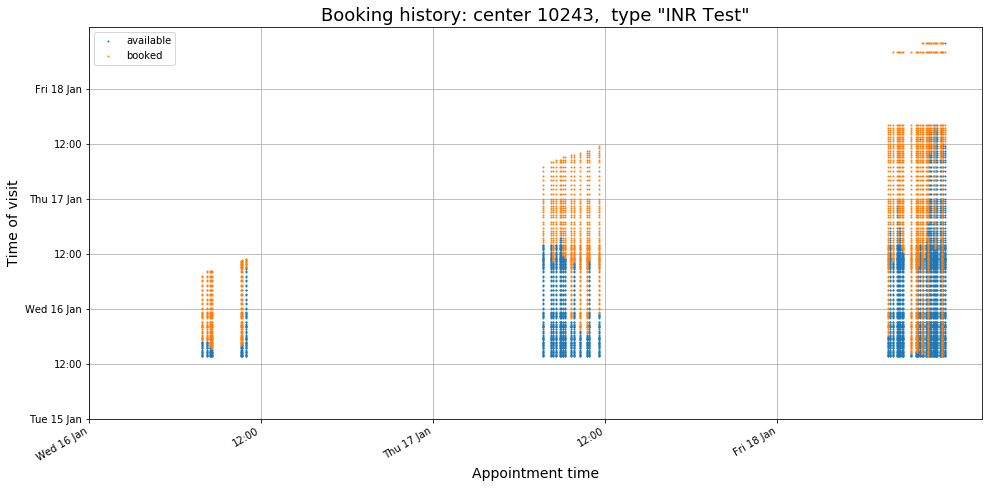

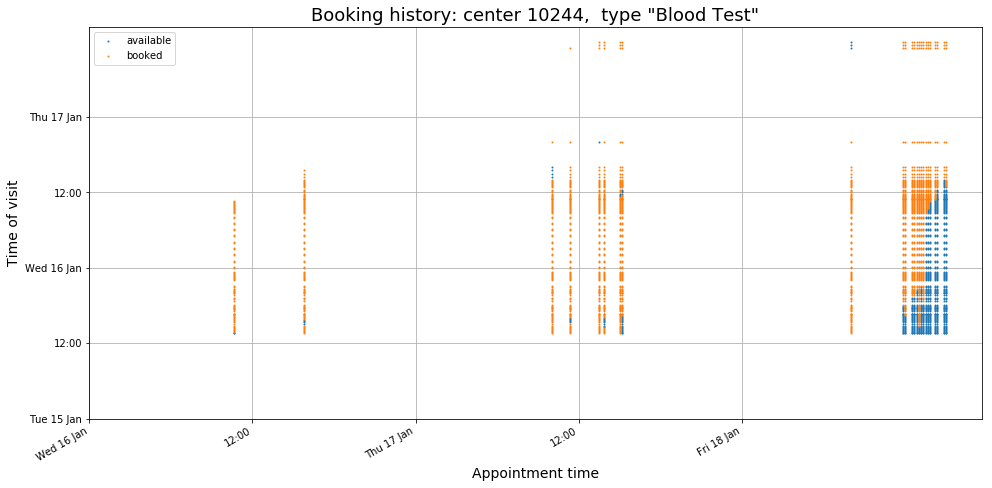

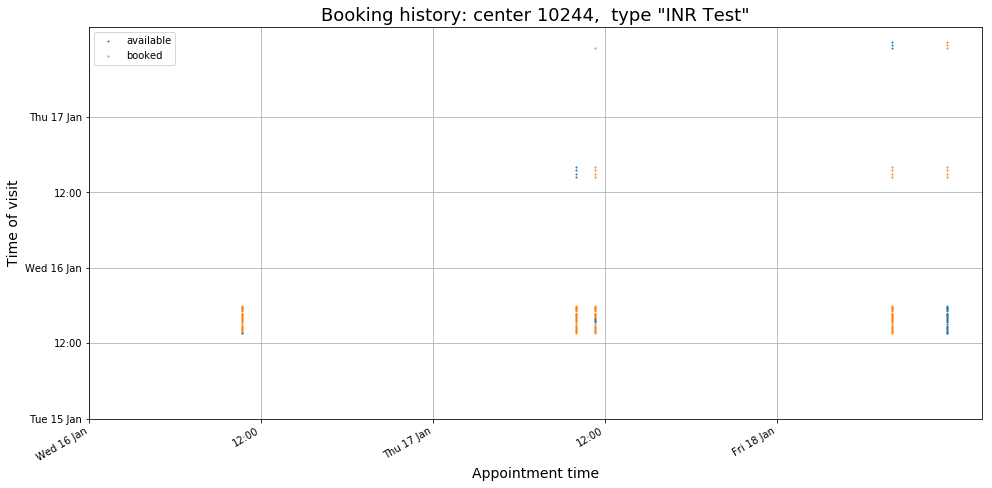

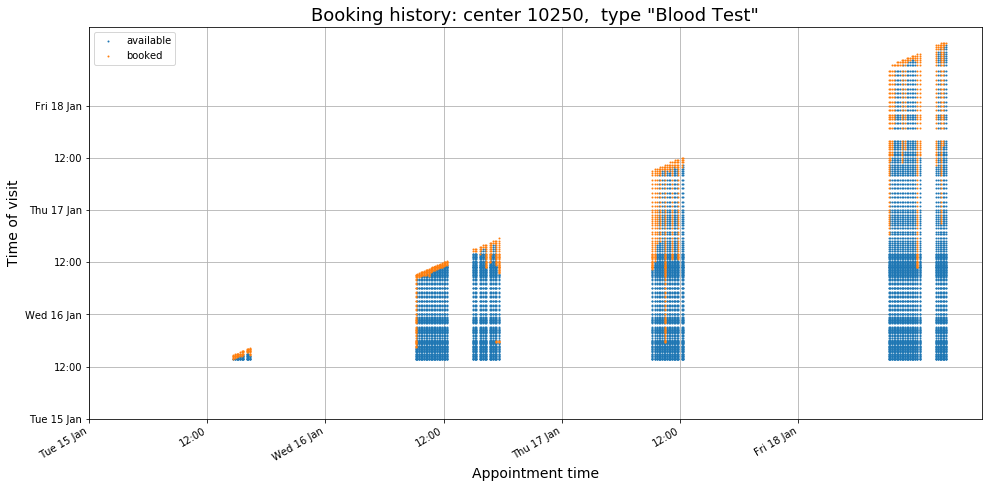

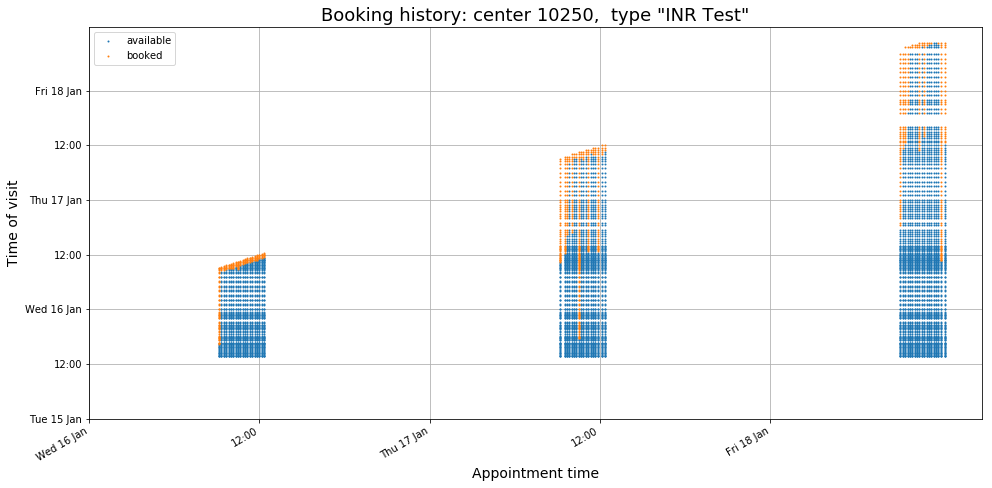

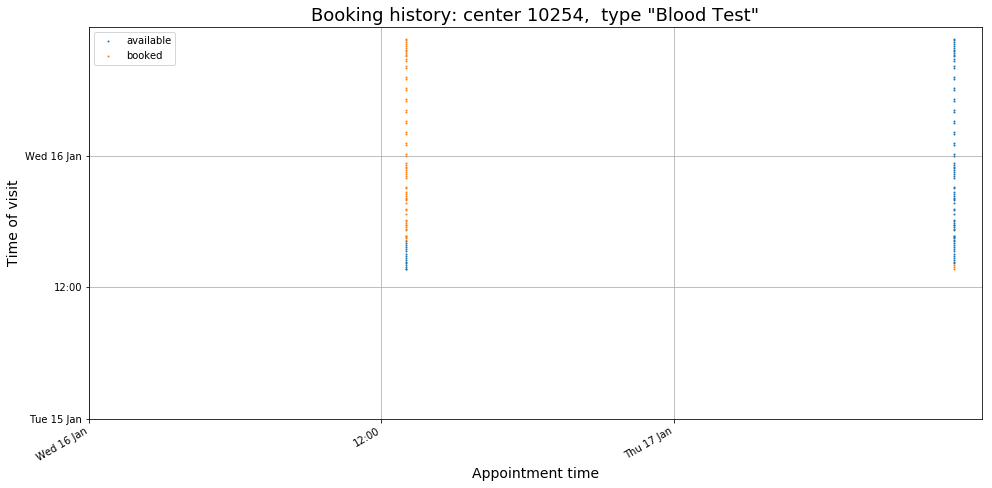

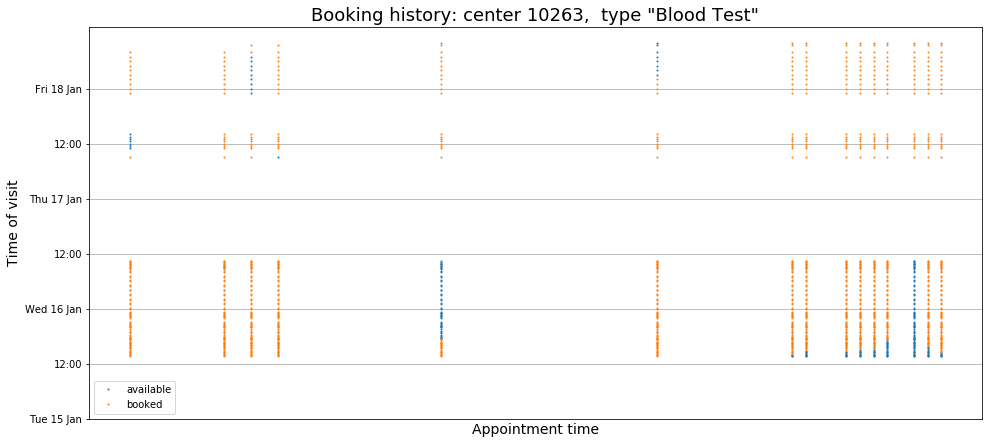

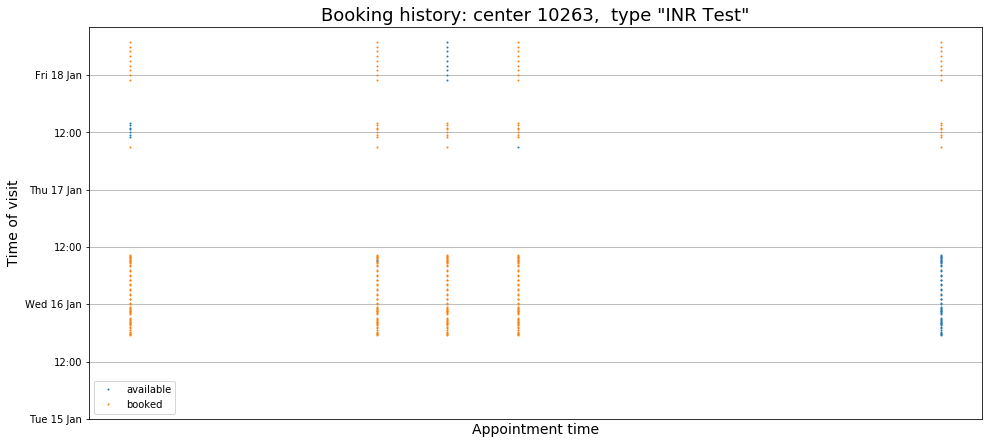

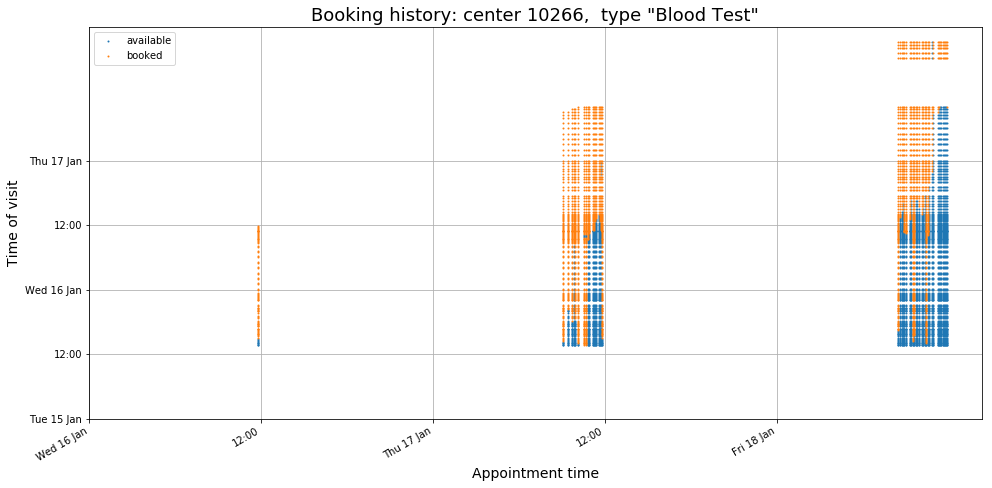

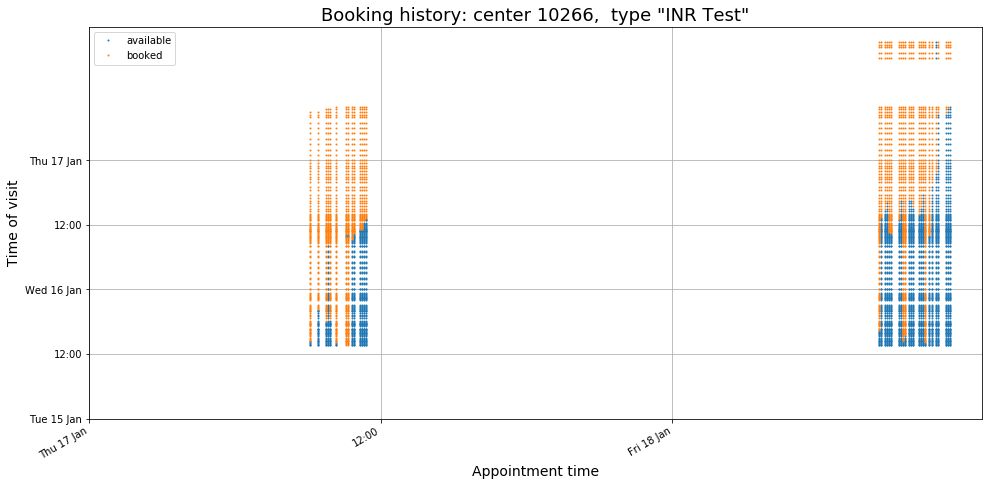

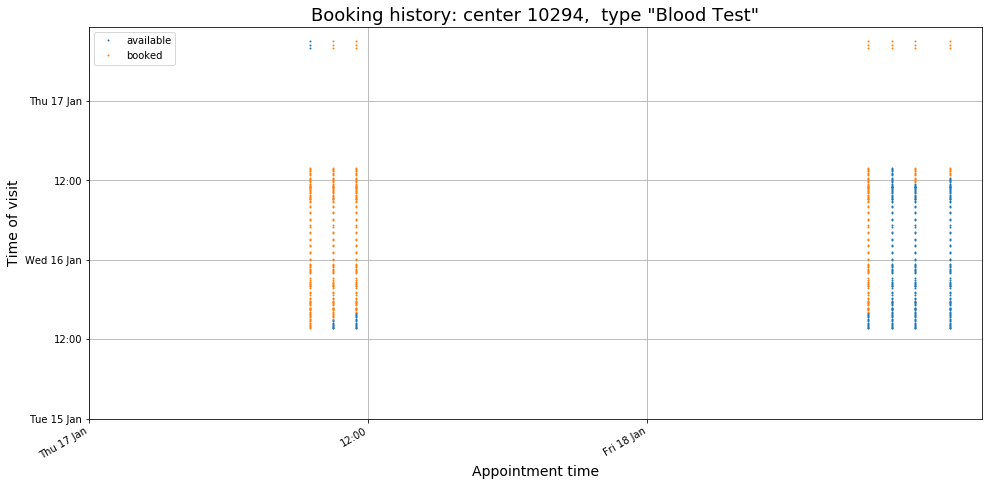

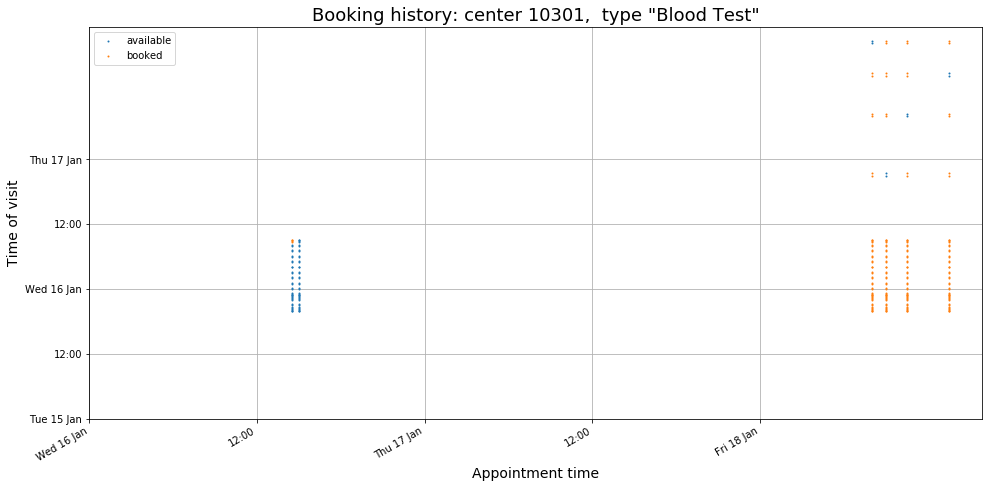

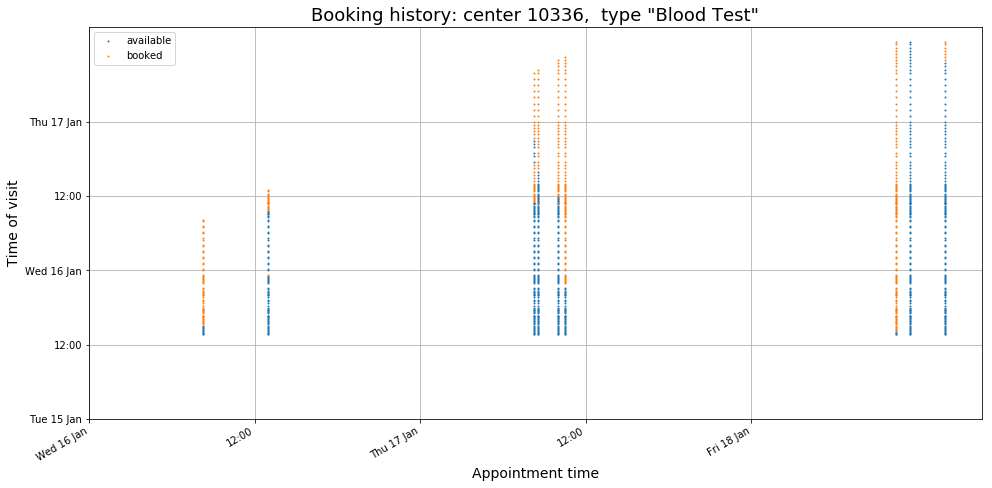

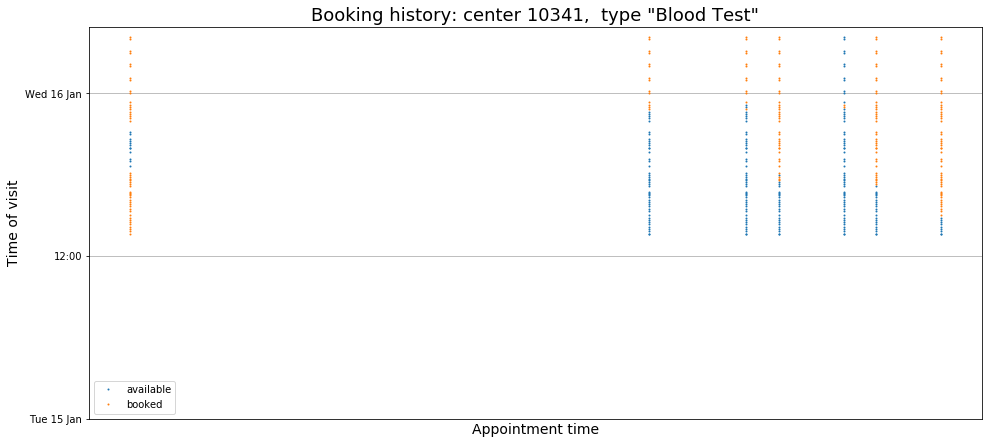

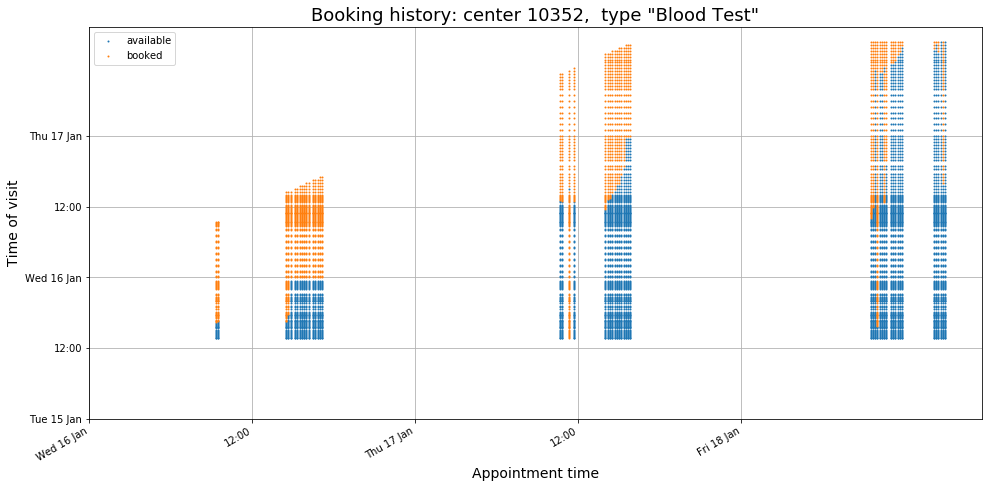

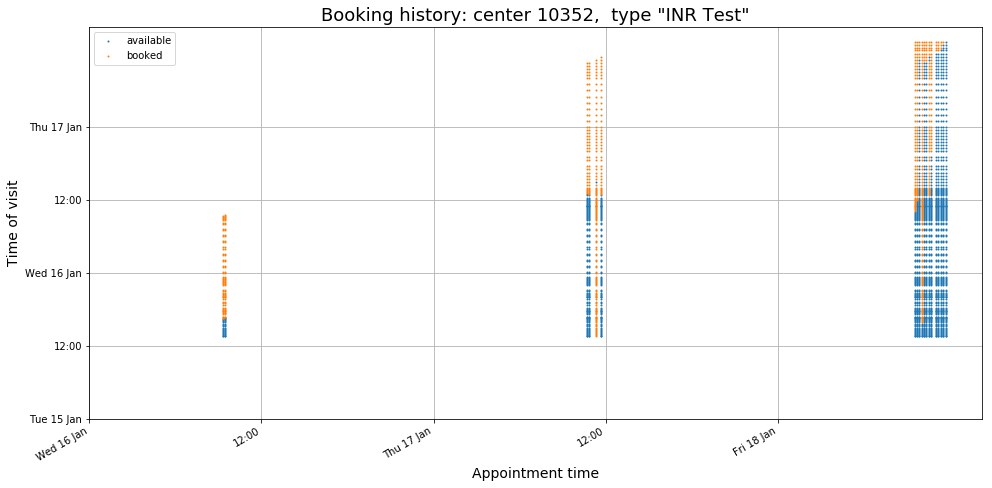

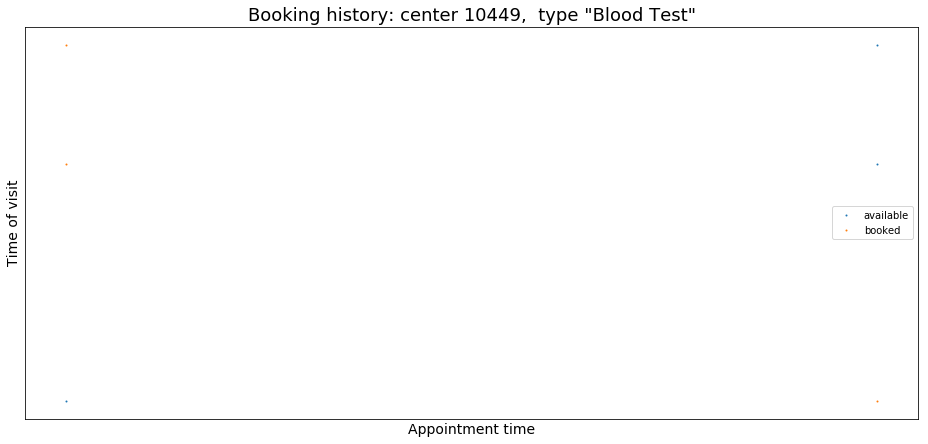

In [14]:
save_figure = False
FIG_SIZE = (16, 8)

COL_WIDTH = 20
VERT_SEP = ": "

if save_figure:
    RUN_DIR = os.path.join(
        IMG_DIR,
        "-".join(
            ["RUN",
             datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")]
        )
    )
    if not os.path.exists(RUN_DIR):
        os.makedirs(RUN_DIR)
    with open(os.path.join(IMG_DIR, 'DESCRIPTION-OF-RUNS.txt'), 'a') as descfile:
        descfile.write("-"*60 + "\n")
        write_line_to_desc("Run", RUN_DIR, descfile)
        write_line_to_desc("Feature", "BOOKING HISTORY", descfile)
        write_line_to_desc("Nb rows", t.shape[0], descfile)

        first_grab = t['grab'].min()
        last_grab = t['grab'].max()
        grab_duration = last_grab - first_grab

        write_line_to_desc("Grab duration", timedelta_strftime(grab_duration), descfile)
        write_line_to_desc("First grab", first_grab, descfile)
        write_line_to_desc("Last grab", last_grab, descfile)

        first_appointment = t['appointment'].min()
        last_appointment= t['appointment'].max()
        appointment_duration = last_appointment - first_appointment

        write_line_to_desc("Appointment duration", timedelta_strftime(appointment_duration), descfile)
        write_line_to_desc("First appointment", first_appointment, descfile)
        write_line_to_desc("Last appointment", last_appointment, descfile)
        
        write_line_to_desc("Figure size", FIG_SIZE, descfile)

for cid, test_types in center_test_types.iterrows():
    print(cid)
    for test_type in list(test_types)[0]:
        print(test_type)
        t0 = t.loc[(t['id'] == cid) & (t['test type'] == test_type), t.columns]
        x_date_range, x_tick_labels = UHCW.get_ticks(t0['appointment'], freq='D')
        y_date_range, y_tick_labels = UHCW.get_ticks(t0['grab'], freq='D')
        fig, ax = plt.subplots(figsize=FIG_SIZE)
        t0[
            t0['status at grab'] == 'available'
        ].plot(
            x='appointment',
            y='grab',
            **{'marker': '.', 'markersize': 2, "linestyle": ""}, # style='.',
            ax=ax
        );
        t0[
            t0['status at grab'] == 'booked'
        ].plot(
            x='appointment',
            y='grab',
            **{'marker': '.', 'markersize': 2, "linestyle": ""}, # style='.',
            ax=ax
        );
        ax.grid()
        ax.legend(['available', 'booked'])
        ax.set_title('Booking history: center {0},  type "{1}"'.format(cid, test_type), fontsize=18);
        ax.set_xlabel("Appointment time", fontsize=14);
        ax.set_ylabel("Time of visit", fontsize=14);
        ax.set_xticks(x_date_range);
        ax.set_xticklabels(x_tick_labels);
        ax.set_yticks(y_date_range);
        ax.set_yticklabels(y_tick_labels);

        if save_figure:
            plt.savefig(
                os.path.join(
                    RUN_DIR,
                    'center-{0}-{1}-booking-history.png'.format(
                        cid,
                        "-".join(test_type.split())
                    )
                )
            )

## Visualizing the final status
The **final status** refers to whether an appointment was eventually booked or not.  

Set `save_figure` to **True** to save plots as image files.
In this case, a brief description of the type of figure is appended to `DESCRIPTION-OF-RUNS.txt`.

10136
Fasting Bloods
Non Fasting Bloods
INR Test
10137
Blood Test
10138
Blood Test
10188
Blood Test
INR Test
10207
Blood Test
10243
Blood Test
INR Test
10244
Blood Test
INR Test
10250
Blood Test
INR Test
10254
Blood Test
10263
Blood Test
INR Test
10266
Blood Test
INR Test
10294
Blood Test
10301
Blood Test
10336
Blood Test
10341
Blood Test
10352
Blood Test
INR Test
10449
Blood Test


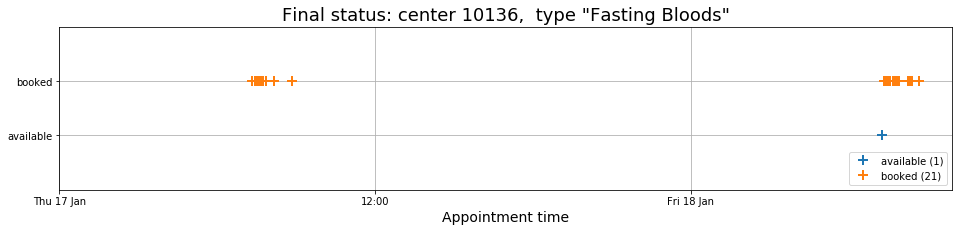

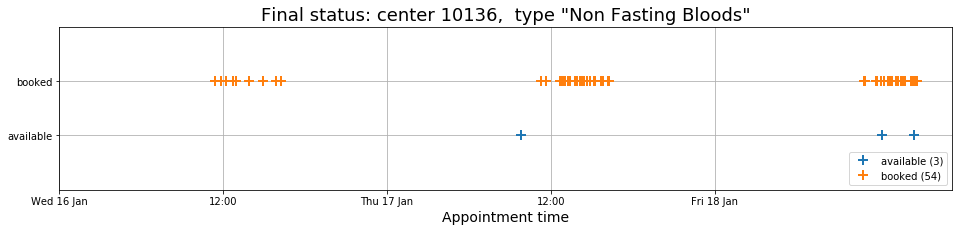

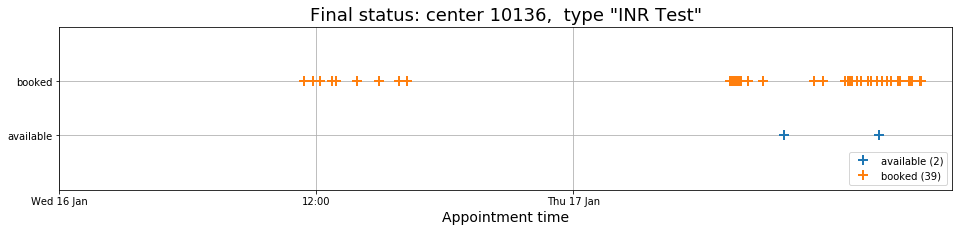

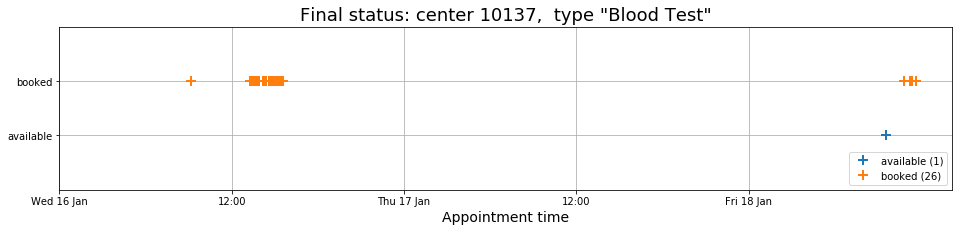

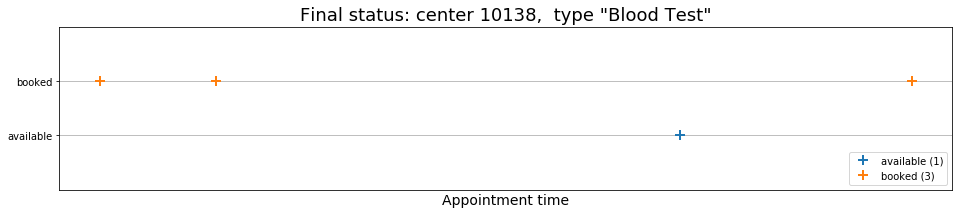

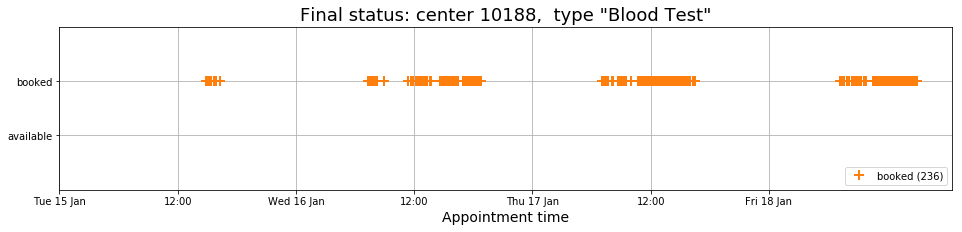

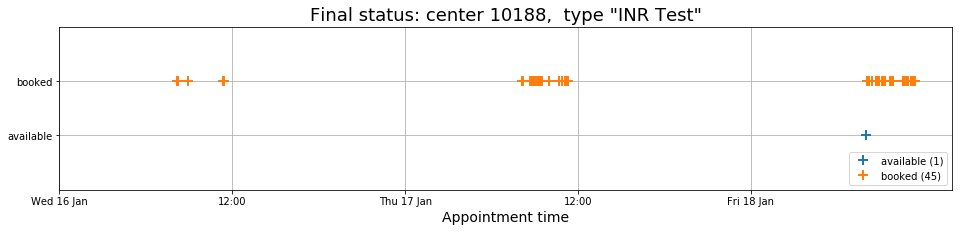

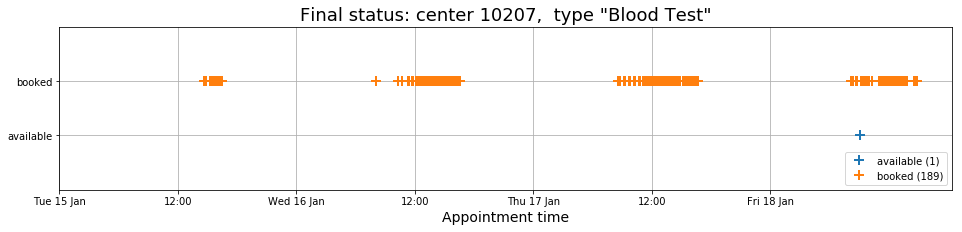

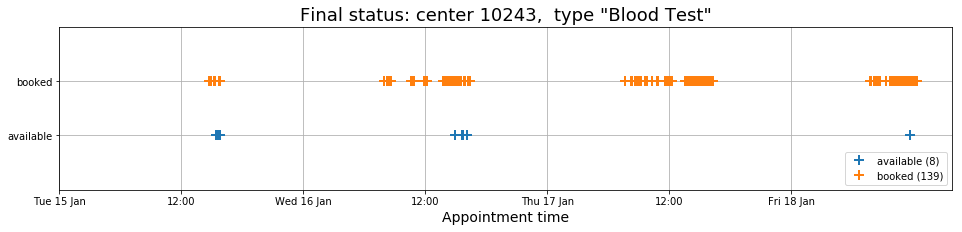

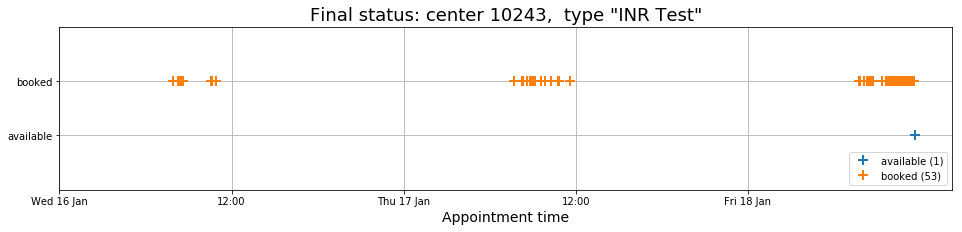

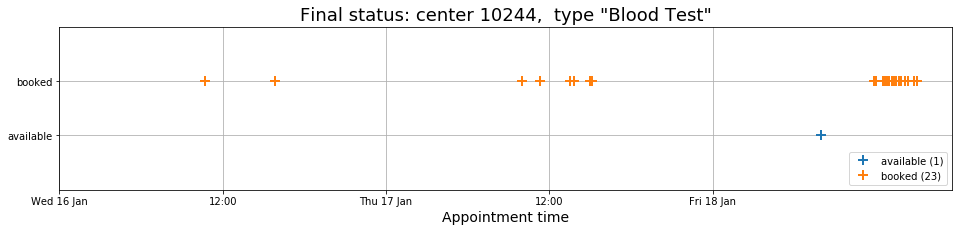

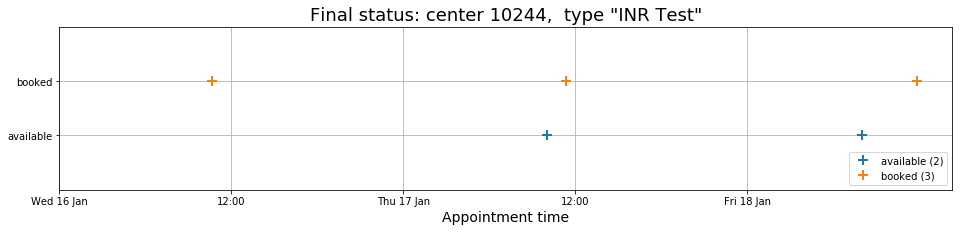

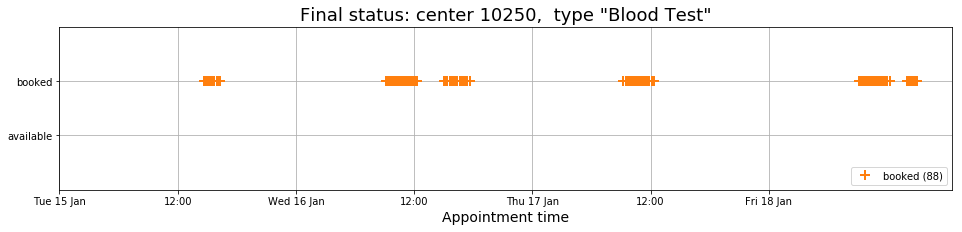

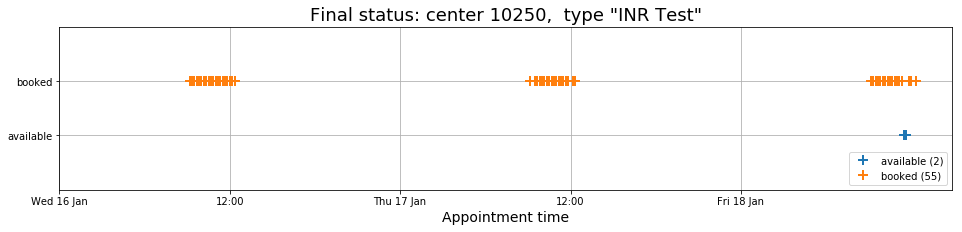

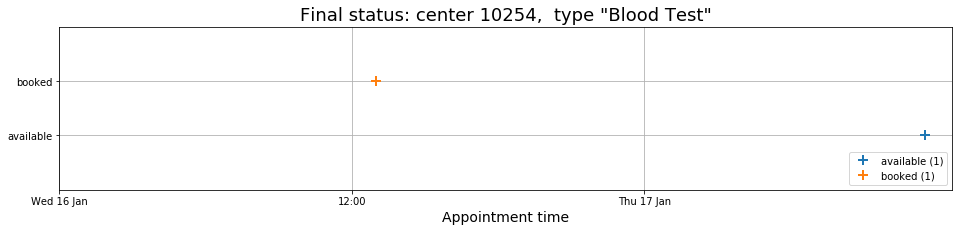

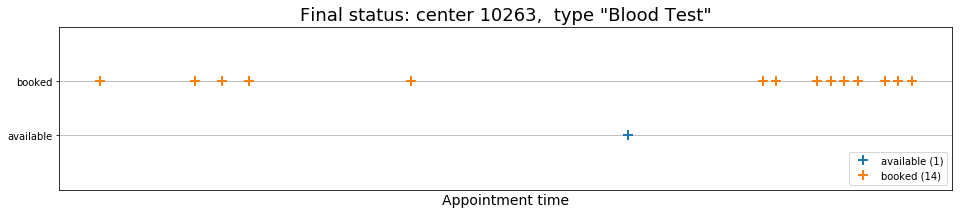

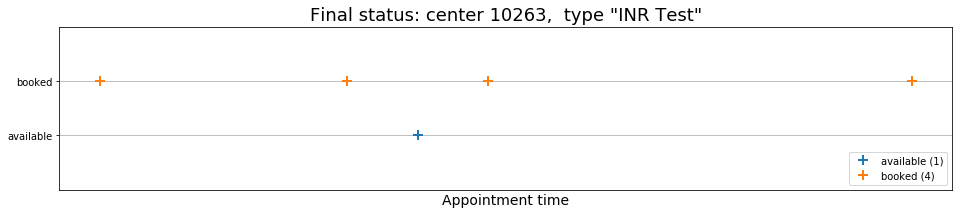

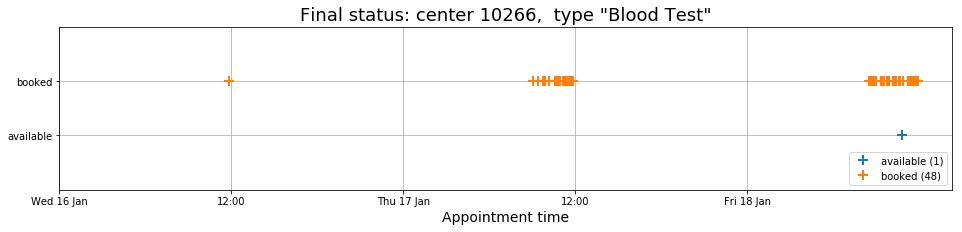

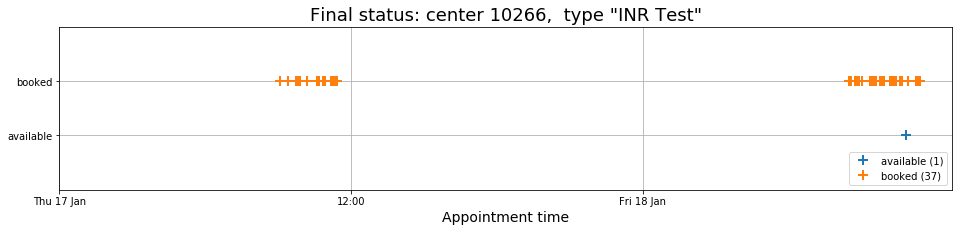

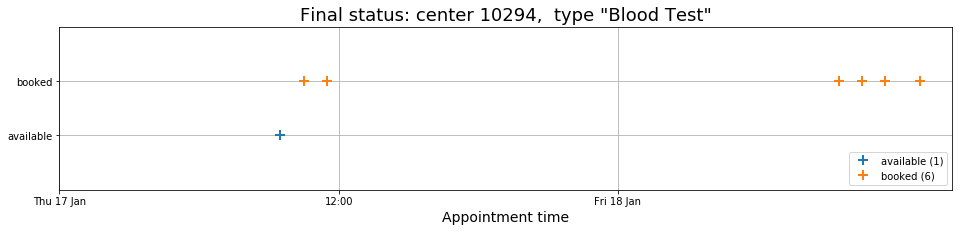

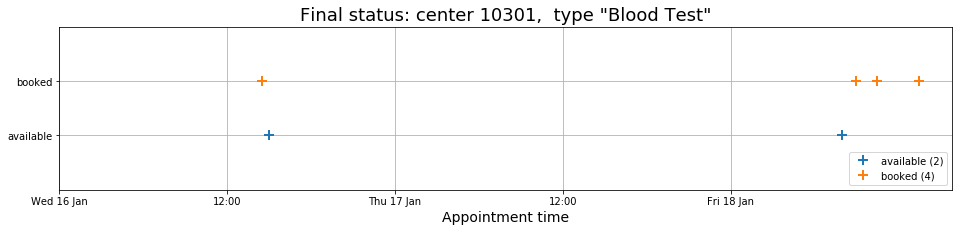

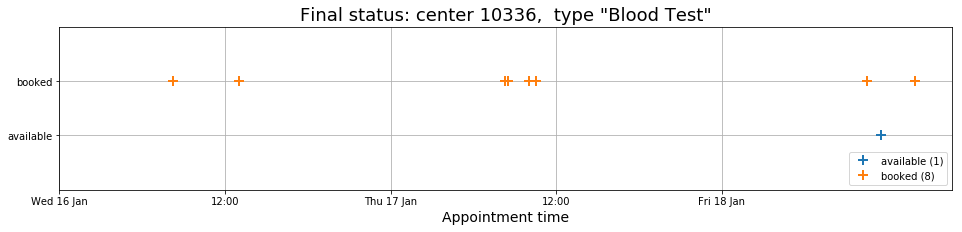

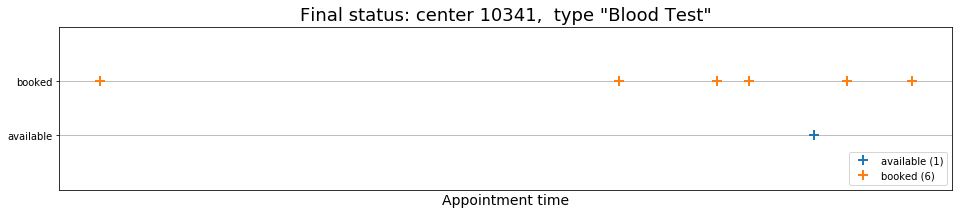

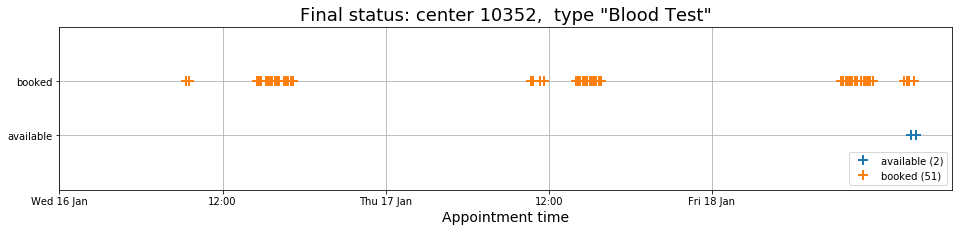

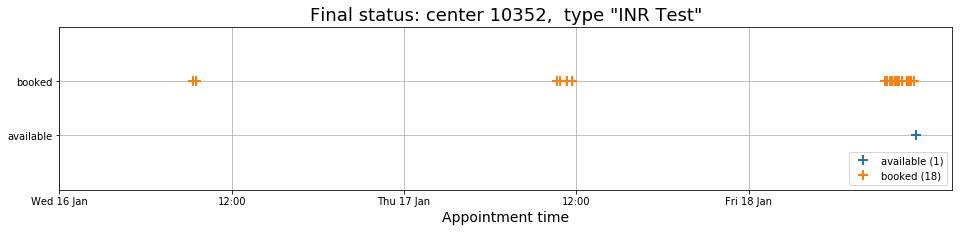

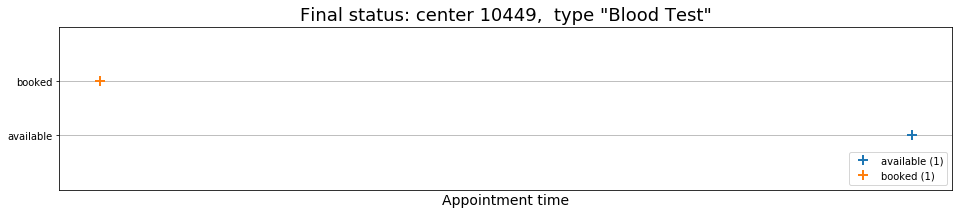

In [16]:
save_figure = False
FIG_SIZE = (16, 3)

COL_WIDTH = 20
VERT_SEP = ": "


def write_line_to_desc(col, text, file):
    file.write(
        "{0}{1}{2}\n".format(
            col.ljust(COL_WIDTH),
            VERT_SEP,
            text
        )
    )
def timedelta_strftime(duration):
    string = "{0} days {1} hours {2} minutes".format(
        duration.days,
        duration.seconds//3600,
        duration.seconds//60
    )
    return string

if save_figure:
    RUN_DIR = os.path.join(
        IMG_DIR,
        "-".join(
            ["RUN",
             datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")]
        )
    )
    if not os.path.exists(RUN_DIR):
        os.makedirs(RUN_DIR)
    with open(os.path.join(IMG_DIR, 'DESCRIPTION-OF-RUNS.txt'), 'a') as descfile:
        descfile.write("-"*60 + "\n")
        write_line_to_desc("Run", RUN_DIR, descfile)
        write_line_to_desc("Feature", "FINAL STATUS", descfile)
        write_line_to_desc("Nb rows", t.shape[0], descfile)

        first_grab = t['grab'].min()
        last_grab = t['grab'].max()
        grab_duration = last_grab - first_grab

        write_line_to_desc("Grab duration", timedelta_strftime(grab_duration), descfile)
        write_line_to_desc("First grab", first_grab, descfile)
        write_line_to_desc("Last grab", last_grab, descfile)

        first_appointment = t['appointment'].min()
        last_appointment= t['appointment'].max()
        appointment_duration = last_appointment - first_appointment

        write_line_to_desc("Appointment duration", timedelta_strftime(appointment_duration), descfile)
        write_line_to_desc("First appointment", first_appointment, descfile)
        write_line_to_desc("Last appointment", last_appointment, descfile)
        
        write_line_to_desc("Figure size", FIG_SIZE, descfile)

for cid, test_types in center_test_types.iterrows():
    print(cid)
    for test_type in list(test_types)[0]:
        print(test_type)
        t0 = t.loc[(t['id'] == cid) & (t['test type'] == test_type), t.columns]
        x_date_range, x_tick_labels = UHCW.get_ticks(t0['appointment'], freq='D')
        y_date_range, y_tick_labels = UHCW.get_ticks(t0['grab'], freq='D')
        
        fig, ax = plt.subplots(figsize=FIG_SIZE)
        
        legend_text = []
        for status in ['available', 'booked']:
            tt0 = t0.loc[
                t0['final status'] == status,
                ['appointment', 'last grab']
            ].drop_duplicates()
            if not tt0.empty:
                legend_text.append(" ".join([status, "({0})".format(tt0.shape[0])]))
                if status == 'available':
                    marker_color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
                else:
                    marker_color = plt.rcParams['axes.prop_cycle'].by_key()['color'][1]
                        
                ax.plot(
                    tt0['appointment'],
                    [STATUS_TO_VALUE[status]]*tt0.shape[0],
                    **{'marker': '+', 'markersize': 10, 'markeredgewidth': 2, 'markeredgecolor': marker_color, "linestyle": ""}                    
                )
                #tt0.plot(
                #    x='appointment',
                #    y=STATUS_TO_VALUE[status],
                #    **{'marker': '+', 'markersize': 10, 'markeredgewidth': 2, 'markeredgecolor': marker_color, "linestyle": ""}, # style='.'
                #    ax=ax
                #);
        ax.grid()
        ax.legend(legend_text, loc='lower right')
        ax.set_title('Final status: center {0},  type "{1}"'.format(cid, test_type), fontsize=18);
        ax.set_xlabel("Appointment time", fontsize=14);
        # ax.set_ylabel("Time of visit", fontsize=14);
        ax.set_xticks(x_date_range);
        ax.set_xticklabels(x_tick_labels);
        ax.set_yticks([0, 1])
        ax.set_yticklabels(
            [{value: key for key, value in STATUS_TO_VALUE.items()}[idx] for idx in [0, 1]]
        )
        ax.set_ylim([-1, 2])

        if save_figure:
            plt.savefig(
                os.path.join(
                    RUN_DIR,
                    'center-{0}-{1}-final-status.png'.format(
                        cid,
                        "-".join(test_type.split())
                    )
                )
            )